In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from sklearn.metrics import classification_report

## №1 
Загрузите датасет taxi.csv.

In [99]:
#Загружаем файл датасета
df=pd.read_csv('taxi.csv')
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


## №2
Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

1.Нулевых значений нет, значит ничего удалять/заменять не нужно.
2.14 столбцов -  14 признаков, 100 000 строк, 12 столбцов с числовым типом, два столбца с категориальным.

In [4]:
df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [11]:
#Рассчитываем моду(самое часто встречаемое значение) для всех колонок
df.mode().head()


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,4,5.0,23.0,1421.0,853342.0,55.961859,37.407126,55.962322,37.407117,-1.0,-1.0,Economy,private,0.0
1,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df[df.offer_gk==4].count()

offer_gk                  1
weekday_key               1
hour_key                  1
driver_gk                 1
order_gk                  1
driver_latitude           1
driver_longitude          1
origin_order_latitude     1
origin_order_longitude    1
distance_km               1
duration_min              1
offer_class_group         1
ride_type_desc            1
driver_response           1
dtype: int64

In [17]:
df[df.order_gk==174182].count()

offer_gk                  2
weekday_key               2
hour_key                  2
driver_gk                 2
order_gk                  2
driver_latitude           2
driver_longitude          2
origin_order_latitude     2
origin_order_longitude    2
distance_km               2
duration_min              2
offer_class_group         2
ride_type_desc            2
driver_response           2
dtype: int64

Выводы: offer_gk - это столбец с уникальными значениями от 4 до 1130355(может это генерируемый ключ предложения по заказу)
weekday_key - от 0 до 6, день недели заказа, номер(видимо 0 это понедельник 6 это воскресенье)
hour_key - от 0 до 23 - час заказа(время суток)
driver_gk - номер водителя
order_gk - номер заказа(видимо если водитель отказывается этот же номер передается другому водителю)
driver_latitude и driver_longitude(широта и долгота) - координаты водителя
origin_order_latitude и origin_order_longitude(координаты заказа) есть отрицательные значения, чего не может быть
distance_km - расстояние заказа(дистанция)есть отрицательные значения, чего не может быть в реальности
duration_min - длительность поездки по времени - есть отрицательные значения, чего не может быть в реальности
offer_class_group - класс автомобиля
ride_type_desc - тип поездки
driver_response - ответ водителя, видимо 1 - это согласие, 0  - это отказ(биномиальное распределение)
Чаще всего такси заказывают по субботам,меньше по четвергам. Обычно расстояние поездки не больше 50 км, есть 175 поездок из 100 000, расстояние которых больше 100км, 2 поездки больше 5000км - это выбросы, и для обучения модели их лучше удалить. Отрицательные значения в координатах, в длительности и расстоянии(значение -1) лучше удалить, можно удалить и со значением 0.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005639388>,
      dtype=object)

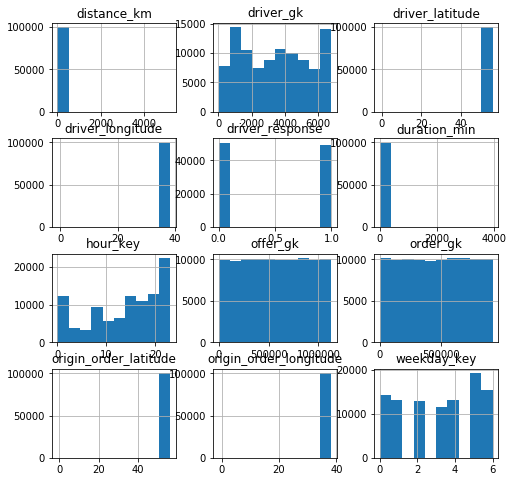

In [6]:
df.hist(figsize=(8,8))

## №3
Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

In [26]:
df.isnull().sum()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

Пропусков(значений типа null в датасете нет)

Есть непонятные значения -1 в длительности поездки и во времени поездки в долготе и широте, я бы избавилась от таких значений, это выбросы непонятного происхождения, их всего 140(если отбирать по широте) - это немного, пос равнению с величиной датасета в 100 000 строк.

In [10]:
df.min()

offer_gk                         4
weekday_key                      0
hour_key                         0
driver_gk                       14
order_gk                        18
driver_latitude                 -1
driver_longitude                -1
origin_order_latitude           -1
origin_order_longitude          -1
distance_km                     -1
duration_min                    -1
offer_class_group         Delivery
ride_type_desc                 SMB
driver_response                  0
dtype: object

In [27]:
df[df.driver_latitude==-1].count()

offer_gk                  140
weekday_key               140
hour_key                  140
driver_gk                 140
order_gk                  140
driver_latitude           140
driver_longitude          140
origin_order_latitude     140
origin_order_longitude    140
distance_km               140
duration_min              140
offer_class_group         140
ride_type_desc            140
driver_response           140
dtype: int64

Так же я бы удалила из датасета поездки, расстояние которых превышает 1000 км, их всего 18.
Можно даже удалить поездки расстояние которых больше 100 км(их всего 175), так как по describe видно, что верхий квартиль это 50 км.

In [33]:
df.max()

offer_gk                  1130355
weekday_key                     6
hour_key                       23
driver_gk                    6806
order_gk                   920344
driver_latitude           56.1741
driver_longitude          38.2805
origin_order_latitude     56.3111
origin_order_longitude    38.2436
distance_km               5234.28
duration_min              3958.28
offer_class_group              XL
ride_type_desc            private
driver_response                 1
dtype: object

In [34]:
df[df.distance_km >1000].count()

offer_gk                  18
weekday_key               18
hour_key                  18
driver_gk                 18
order_gk                  18
driver_latitude           18
driver_longitude          18
origin_order_latitude     18
origin_order_longitude    18
distance_km               18
duration_min              18
offer_class_group         18
ride_type_desc            18
driver_response           18
dtype: int64

In [31]:
df[df.distance_km >100].count()

offer_gk                  175
weekday_key               175
hour_key                  175
driver_gk                 175
order_gk                  175
driver_latitude           175
driver_longitude          175
origin_order_latitude     175
origin_order_longitude    175
distance_km               175
duration_min              175
offer_class_group         175
ride_type_desc            175
driver_response           175
dtype: int64

In [36]:
df[df.distance_km ==0].head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
859,346101,4,12,4215,70206,55.758458,37.710545,55.747802,37.715600,0.0,0.0,Economy,private,1
1179,166480,5,8,1706,234100,55.787066,37.563235,55.792505,37.563787,0.0,0.0,Economy,private,1
2435,839922,3,12,6792,845047,55.415367,37.898310,55.410307,37.902451,0.0,0.0,Standard,private,1
2918,904433,5,18,1514,228992,55.681763,37.480773,55.671333,37.464131,0.0,0.0,Standard,private,0
3357,149416,4,6,4269,401598,55.961844,37.409798,55.961995,37.406355,0.0,0.0,Economy,private,0


Так же можно удалить поездки со значением в расстоянии и времени равными 0. 
Непонятно, то ли это клиент не вышел, то ли расстояние до пункта назначения меньше 1 км. 
Они испортят обучение модели., их всего 175, тоже небольшое количество. Можно конечно заменить на 1 км, чтобы не терять данные.

In [100]:
df1 = df[df.driver_latitude!=-1]
df1.min()

offer_gk                         4
weekday_key                      0
hour_key                         0
driver_gk                       14
order_gk                        18
driver_latitude                  0
driver_longitude                 0
origin_order_latitude           -1
origin_order_longitude          -1
distance_km                     -1
duration_min                    -1
offer_class_group         Delivery
ride_type_desc                 SMB
driver_response                  0
dtype: object

In [101]:
df1 = df1[df1.distance_km!=-1]
df1.min()

offer_gk                         4
weekday_key                      0
hour_key                         0
driver_gk                       14
order_gk                        27
driver_latitude                  0
driver_longitude                 0
origin_order_latitude           -1
origin_order_longitude          -1
distance_km                      0
duration_min                     0
offer_class_group         Delivery
ride_type_desc                 SMB
driver_response                  0
dtype: object

In [102]:
df1 = df1[df1.driver_latitude!=0]
df1.min()

offer_gk                         4
weekday_key                      0
hour_key                         0
driver_gk                       14
order_gk                        27
driver_latitude            55.3677
driver_longitude           36.9848
origin_order_latitude           -1
origin_order_longitude          -1
distance_km                      0
duration_min                     0
offer_class_group         Delivery
ride_type_desc                 SMB
driver_response                  0
dtype: object

In [103]:
df1 = df1[df1.origin_order_latitude>0]
df1.min()

offer_gk                         4
weekday_key                      0
hour_key                         0
driver_gk                       14
order_gk                        27
driver_latitude            55.3677
driver_longitude           36.9848
origin_order_latitude      55.3425
origin_order_longitude     36.9941
distance_km                      0
duration_min                     0
offer_class_group         Delivery
ride_type_desc                 SMB
driver_response                  0
dtype: object

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73763 entries, 1 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   offer_gk                73763 non-null  int64  
 1   weekday_key             73763 non-null  int64  
 2   hour_key                73763 non-null  int64  
 3   driver_gk               73763 non-null  int64  
 4   order_gk                73763 non-null  int64  
 5   driver_latitude         73763 non-null  float64
 6   driver_longitude        73763 non-null  float64
 7   origin_order_latitude   73763 non-null  float64
 8   origin_order_longitude  73763 non-null  float64
 9   distance_km             73763 non-null  float64
 10  duration_min            73763 non-null  float64
 11  offer_class_group       73763 non-null  object 
 12  ride_type_desc          73763 non-null  object 
 13  driver_response         73763 non-null  int64  
dtypes: float64(6), int64(6), object(2)
mem

Так остается 73 тыс строк из 100 тыс. 
Потеря где-то 16 процентов, но убирать координаты совсем - можно исказить обучение. 
Заменять средним или модой, тоже будет неправильное соответствие по другим признакам в строке.
Поэтому принято решение такие строки удалить из датасета и работать с оставшимися. 

In [105]:
df[df.driver_latitude<=0].distance_km.value_counts()

-1.000      122
 57.712       1
 53.921       1
 83.491       1
 40.973       1
 21.160       1
 83.026       1
 34.004       1
 18.294       1
 83.872       1
 105.126      1
 39.508       1
 4.945        1
 41.576       1
 34.225       1
 83.923       1
 43.726       1
 45.008       1
 45.879       1
 70.529       1
Name: distance_km, dtype: int64

## №4
Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

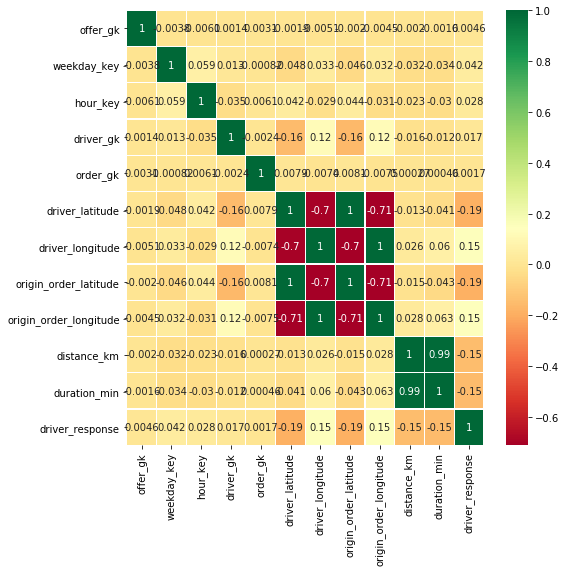

In [106]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [107]:
df1.corr()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
offer_gk,1.000000,-0.003768,-0.006092,0.001422,0.003096,-0.001919,-0.005138,-0.002039,-0.004527,-0.002038,-0.001601,0.004568
weekday_key,-0.003768,1.000000,0.058734,0.013362,-0.000820,-0.047588,0.032867,-0.045782,0.031790,-0.032405,-0.034437,0.042334
hour_key,-0.006092,0.058734,1.000000,-0.035414,0.006071,0.041915,-0.028969,0.043637,-0.031303,-0.023203,-0.030338,0.027692
driver_gk,0.001422,0.013362,-0.035414,1.000000,-0.002378,-0.156287,0.119452,-0.157133,0.120662,-0.016029,-0.012239,0.017408
order_gk,0.003096,-0.000820,0.006071,-0.002378,1.000000,0.007907,-0.007408,0.008074,-0.007485,0.000270,0.000462,0.001737
driver_latitude,-0.001919,-0.047588,0.041915,-0.156287,0.007907,1.000000,-0.702490,0.998562,-0.708884,-0.013030,-0.040759,-0.189199
driver_longitude,-0.005138,0.032867,-0.028969,0.119452,-0.007408,-0.702490,1.000000,-0.704488,0.995765,0.025660,0.059597,0.154790
origin_order_latitude,-0.002039,-0.045782,0.043637,-0.157133,0.008074,0.998562,-0.704488,1.000000,-0.711088,-0.015293,-0.043175,-0.185888
origin_order_longitude,-0.004527,0.031790,-0.031303,0.120662,-0.007485,-0.708884,0.995765,-0.711088,1.000000,0.028436,0.062843,0.153452
distance_km,-0.002038,-0.032405,-0.023203,-0.016029,0.000270,-0.013030,0.025660,-0.015293,0.028436,1.000000,0.987098,-0.147693


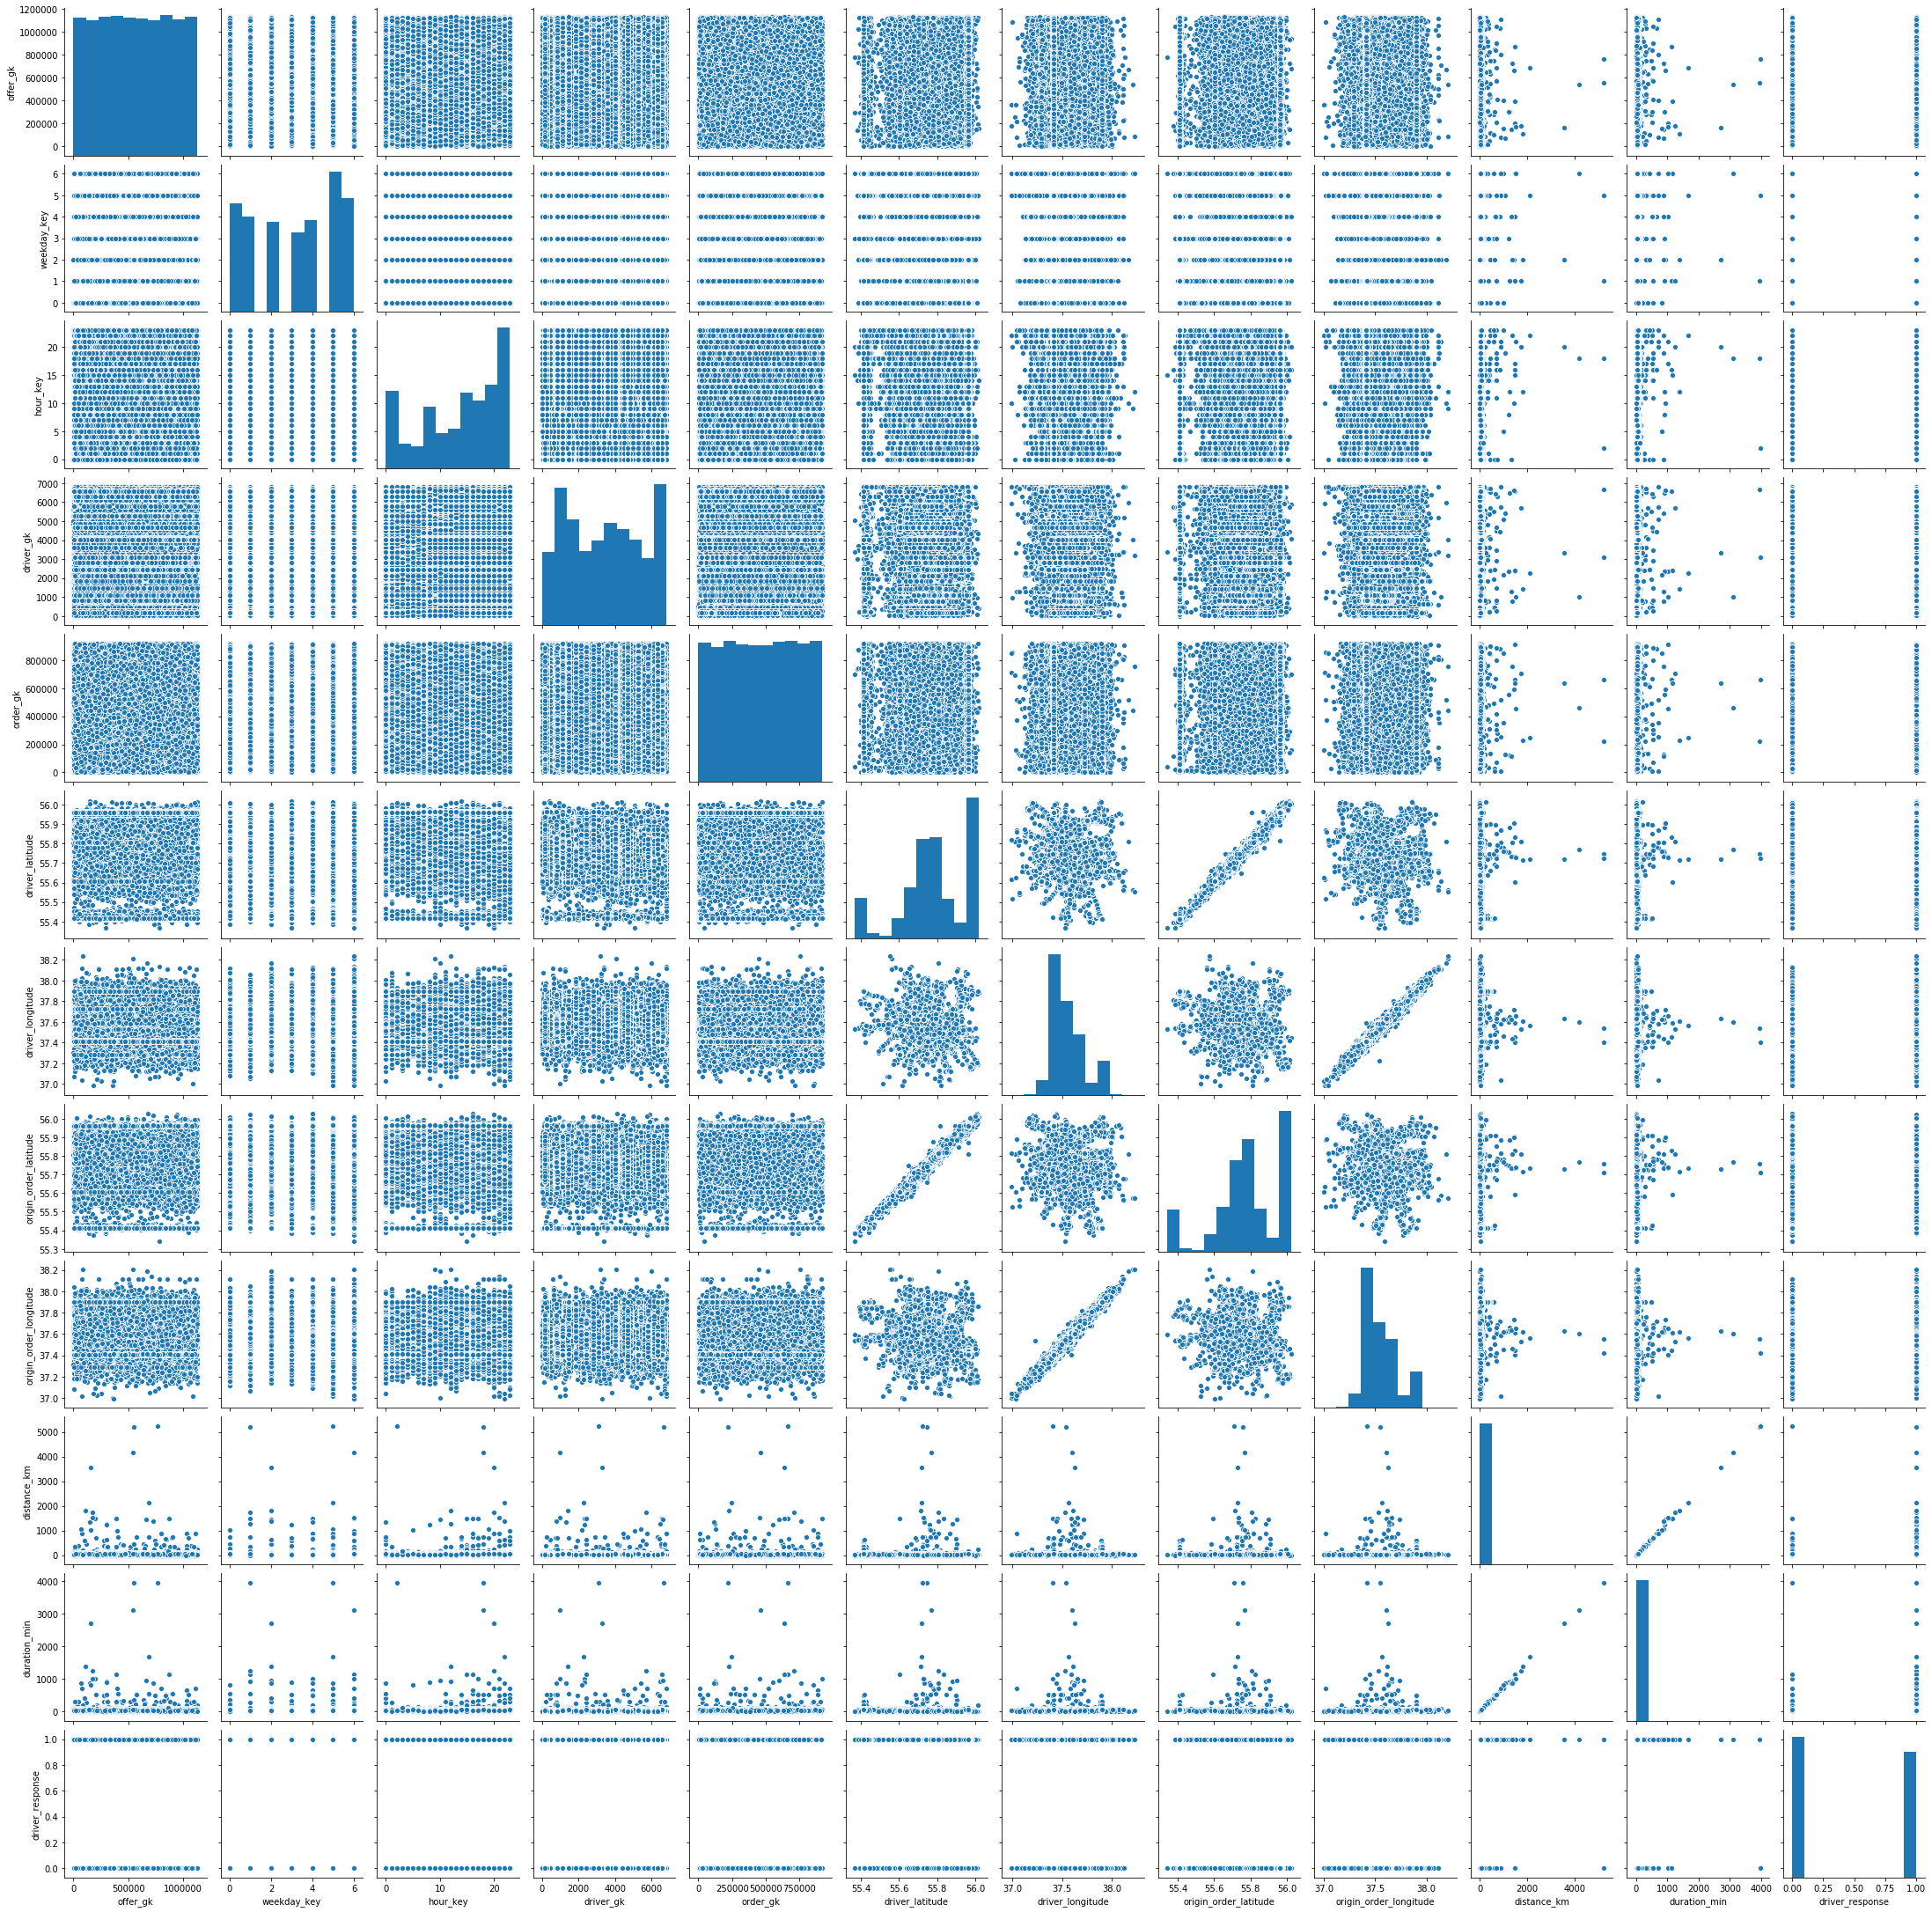

In [108]:
#Точечтные графики зависимостей переменных. Сильных зависимостей нет(это и видно по матрице корреляций и по коэффициентам)
sns.pairplot(df1)

Коррелируют между собой только долгота и широта заказа, долгота и широта водителя, расстояние поездки и продолжительность поездки.

In [109]:
#Удалим столбец offer_gk, онс уникальными значениями и для оучения он не несет никакой смысловой нагрузки
df1.drop(['offer_gk'], axis=1, inplace=True)
#Проверим на наличие дубликатов
df1.duplicated().sum()

6

In [110]:
df1.shape

(73763, 13)

In [111]:
#Удалим дубликаты
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [112]:
df1.head(1)

,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1


## №5
Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

Категориальных признака всего 2. Признак offer_class_group можно сократить до трех значений. 
Ниже идет проверка сколько какого класса машин в нашем таксопарке. Economy - 361, Standard  - 356 и остальных 198. 
Объединим остальные и назовем их Comfort(и вызовов у этого класса значительно меньше)

In [113]:
df2=df1[['offer_class_group','driver_gk']]
df2.duplicated().sum()

72843

In [114]:
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

C:\Lena\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [115]:
df1['offer_class_group'].value_counts()

Economy     40813
Standard    29910
Premium      1010
Delivery      888
Kids          569
XL            448
VIP           108
VIP+           11
Name: offer_class_group, dtype: int64

In [116]:
df2['offer_class_group'].value_counts()

Economy     360
Standard    356
Delivery    103
Kids         60
Premium      20
XL            9
VIP+          3
VIP           3
Name: offer_class_group, dtype: int64

In [117]:
df1['offer_class_group'] = df['offer_class_group'].replace('Delivery', 'Comfort').replace('Kids','Comfort').replace('Premium', 'Comfort').replace('XL', 'Comfort').replace('VIP+', 'Comfort').replace('VIP', 'Comfort')

In [118]:
df1['offer_class_group'].value_counts()

Economy     40813
Standard    29910
Comfort      3034
Name: offer_class_group, dtype: int64

Второй категориальный признак это ride_type_desc

In [119]:
df1['ride_type_desc'].value_counts()

private     73585
business      153
SMB            19
Name: ride_type_desc, dtype: int64

In [120]:
#Объединим business и SMB в один тип business, так как количество значений невелико.
df1['ride_type_desc'] = df['ride_type_desc'].replace('SMB', 'business')
df1['ride_type_desc'].value_counts()

private     73585
business      172
Name: ride_type_desc, dtype: int64

Для упощения обучения заменим класс автомобиля цифрами(категориальный признак на числовой) 0 - Economy, 1 - Standard и Comfort - 2 
ride_type_desc заменим private 0 и business 1

In [121]:
df1['ride_type_desc'] = df1['ride_type_desc'].replace('private', 0).replace('business', 1)
df1['offer_class_group'] = df1['offer_class_group'].replace('Economy', 0).replace('Standard',1).replace('Comfort', 2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73757 entries, 1 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekday_key             73757 non-null  int64  
 1   hour_key                73757 non-null  int64  
 2   driver_gk               73757 non-null  int64  
 3   order_gk                73757 non-null  int64  
 4   driver_latitude         73757 non-null  float64
 5   driver_longitude        73757 non-null  float64
 6   origin_order_latitude   73757 non-null  float64
 7   origin_order_longitude  73757 non-null  float64
 8   distance_km             73757 non-null  float64
 9   duration_min            73757 non-null  float64
 10  offer_class_group       73757 non-null  int64  
 11  ride_type_desc          73757 non-null  int64  
 12  driver_response         73757 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 7.9 MB


## №6
Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

У нас есть четыре столбца с координатами, наверное нас интересует разница в координатах водителя и заказа.
Вместо четырех столбцов сделам два, возьмем модуль разницы. 
У нас высокая корреляция у расстояния и длительности поездки, поэтому можно оставить один признак - расстояние, и заменим 0 км на 1 км

In [125]:
df1['dif_latitude'] = abs(df1['driver_latitude'] - df1['origin_order_latitude'])
df1['dif_longitude'] = abs(df1['driver_longitude'] - df1['origin_order_longitude'])
df1['distance_km'] = df1['distance_km'].replace(0, 1)
df1.describe()

,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,dif_latitude,dif_longitude
count,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.000000,73757.00000,73757.000000,73757.000000
mean,3.150209,13.801022,3461.477487,461947.232751,55.780807,37.546496,55.780151,37.546153,25.276445,31.700689,0.487791,0.002332,0.47167,0.005710,0.010083
std,2.078255,7.316002,2038.991964,266093.757574,0.157283,0.160264,0.159549,0.163063,45.954801,35.726605,0.576303,0.048235,0.49920,0.006717,0.011298
min,0.000000,0.000000,14.000000,27.000000,55.367720,36.984771,55.342523,36.994072,0.005000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,8.000000,1421.000000,230773.000000,55.705848,37.413468,55.705637,37.407117,7.901000,16.567000,0.000000,0.000000,0.00000,0.001162,0.002726
50%,3.000000,16.000000,3507.000000,463129.000000,55.774829,37.528477,55.775037,37.527348,18.604000,28.183000,0.000000,0.000000,0.00000,0.003716,0.006426
75%,5.000000,20.000000,5246.000000,692512.000000,55.961102,37.625653,55.962322,37.625467,38.730000,44.333000,1.000000,0.000000,1.00000,0.007599,0.012876
max,6.000000,23.000000,6806.000000,920344.000000,56.018542,38.232760,56.025061,38.204119,5234.283000,3958.283000,2.000000,1.000000,1.00000,0.152620,0.310750


In [130]:
#Весь остальной километраж округлим в большую сторону
df1[df1['distance_km']<1].count()

weekday_key               323
hour_key                  323
driver_gk                 323
order_gk                  323
driver_latitude           323
driver_longitude          323
origin_order_latitude     323
origin_order_longitude    323
distance_km               323
duration_min              323
offer_class_group         323
ride_type_desc            323
driver_response           323
dif_latitude              323
dif_longitude             323
dtype: int64

In [133]:
#округлим все значения расстояния
df1['distance_km'] = round(df1['distance_km']) 

In [134]:
#Заменим 0 на 1 км
df1['distance_km'] = df1['distance_km'].replace(0, 1)

In [135]:
df1[df1['distance_km']<1].count()

weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dif_latitude              0
dif_longitude             0
dtype: int64

Коэффициент корреляции Пирсона: -0.28338752684058643


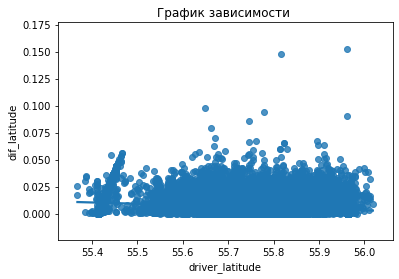

In [136]:
from scipy.stats import pearsonr
y = df1['dif_latitude']
x = df1['driver_latitude']
sns.regplot(x = x, y = y, data = df, fit_reg = True)
plt.title('График зависимости ')
plt.grid(False)
corr, p_value = pearsonr(x,y)
print('Коэффициент корреляции Пирсона:', corr)
plt.show()

Удалим столбцы с номером заказа, с номером водителя(мы не будем считать, что согласие или отказ зависит конкретно от водителя авто) - для обучения они не важны. 
Удалим все столбцы с координатами, оставим только разницу. Удалим время поездки. Избавимся от дубликатов.


In [137]:
df1.drop(['order_gk', 'driver_gk', 'driver_latitude', 'driver_longitude','origin_order_latitude','origin_order_longitude','duration_min'], axis=1, inplace=True)
df1.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,dif_latitude,dif_longitude
1,5,14,19.0,1,0,1,0.013987,0.048625
2,6,14,7.0,0,0,0,0.000849,0.006386
4,4,16,12.0,0,0,1,0.008981,0.005805
5,6,15,7.0,0,0,0,0.004136,0.006959
7,5,20,2.0,0,0,0,0.000184,0.055239


In [139]:
#df2.drop_duplicates(inplace=True)
df1.duplicated().sum()

1552

In [140]:
df1.drop_duplicates(inplace=True)
df1.shape

(72205, 8)

## №7
Разделите выборку на обучаемую и тестовую.

In [142]:
X_columns = [c for c in df1.columns if c != 'driver_response']
y_column = 'driver_response'
X = df1[X_columns]
y = df1[y_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [143]:
X_train.shape, X_test.shape

((57764, 7), (14441, 7))

In [144]:
y_train.shape, y_test.shape

((57764,), (14441,))

## №8
Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [145]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


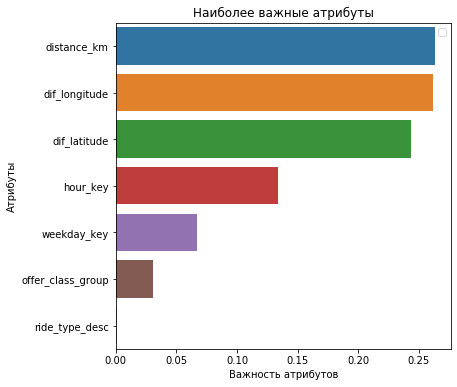

In [146]:
#Выведем наиболее важные атрибуты
headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Вывод: Наиболее важные атрибуты при отказе или согласии водителя  - это расстояние поездки и позиция водителя относительно точки заказа. Так же играет роль час заказа(время суток)